# Scikit-Learn Cours - Machine Learning

By freeCodeCamp.org

https://www.youtube.com/watch?v=pqNCD_5r0IU&list=PLY8_mf17J6TIGNwBjKW3t1Pwdb59t30Kt&index=7&t=2s


## Train Test Split

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

# split it in features and labels
X = iris.data
y = iris.target

print(f"Features:\n{X[:5]}\n...\n\nLabels:\n{y[:5]}\n...")

Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
...

Labels:
[0 0 0 0 0]
...


In [3]:
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## KNN Example

In [5]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv("data/car.data")

In [7]:
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [8]:
last_column_label = data.columns[-1]
y = data[last_column_label].copy().to_frame(name=last_column_label)
X = data.drop(columns=[last_column_label])

In [9]:
print(f"X sample:\n{X.head()}\n\ny sample:\n{y.head()}")

X sample:
  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med

y sample:
   class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


### Converting the data

In [10]:
X = X.values
Le = LabelEncoder()
for i in range(X.shape[1]):
    X[:, i] = Le.fit_transform(X[:, i])

In [11]:
print(X)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [12]:
#y
label_mapping = {
  'unacc':0,
  'acc':1,
  'good':2,
  'vgood':3
 }
y['class'] = y['class'].map(label_mapping)
Y = np.array(y)

In [13]:
print(y)

      class
0         0
1         0
2         0
3         0
4         0
...     ...
1723      2
1724      3
1725      0
1726      2
1727      3

[1728 rows x 1 columns]


### Create model

In [23]:
knn = neighbors.KNeighborsClassifier(
    n_neighbors=25,
    weights='uniform'
)
# somethign about 37 check comments

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, predictions)

print(f"Predictions: {predictions}")
print(f"Accuracy : {accuracy}")

a = 345
# check why is not working
# print(f"actual value: {y[a]}, predicted value: {knn.predict(X[a])}")
print(f"actual value: {y.loc[a, 'class']}, predicted value: {predictions[a]}")

Predictions: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3
 1 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 3 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0]
Accuracy : 0.8121387283236994
actual value: 0, predicted value: 0


/Users/florian/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Support Vector Machine

### Train tesrt split

In [6]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# split it in features and labels
X = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model

In [7]:
model = svm.SVC()
model.fit(X_train, y_train)

print(model)

SVC()


### Predictions

In [10]:
predictions = model.predict(X_test)

acc = accuracy_score(y_test, predictions)

print(f"Predictions: {predictions} \nActual: {y_test}\nAccuracy: {acc}")

Predictions: [0 0 1 1 0 2 1 1 1 0 0 0 2 2 2 2 1 1 1 1 0 1 0 1 0 0 0 0 1 0] 
Actual: [0 0 1 1 0 2 1 1 1 0 0 0 1 2 2 2 1 1 1 1 0 1 0 1 0 0 0 0 1 0]
Accuracy: 0.9666666666666667


## Linear Regression

In [15]:
# importing libraires

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
# loading data to pandas

#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#boston = pd.read_csv('data/housing.csv.xls', header=None, delimiter=r"\s+", names=column_names)

# loading data to numpy
boston = pd.read_csv('data/housing.csv.xls', header=None, delimiter=r"\s+")
boston = boston.to_numpy()


In [62]:
# separating labels from features

y = boston[:, -1:]
X = boston[:, :-1]

In [69]:
# shapes of you

print(f"Features shape: {X.shape}\nLabel shape: {y.shape}")

Features shape: (506, 13)
Label shape: (506, 1)


In [70]:
# model

l_reg = linear_model.LinearRegression()

### Simple data visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

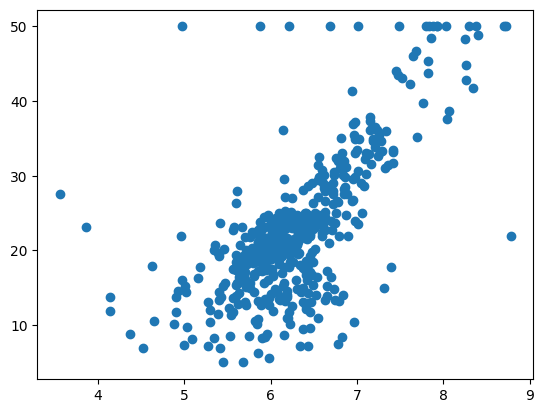

In [72]:
plt.scatter(X.T[5], y)
plt.show

By observing this linear trend we know that data should be proper for Linear regression.

In [73]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
# model training

model = l_reg.fit(X_train, y_train)

# predictions

predictions = model.predict(X_test)

print(f"Predictions: {predictions}")

# R-squared value
r_squared = model.score(X, y)
print(f"R^2 value: {r_squared}")

# coefficients
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

# intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")

Predictions: [[26.10740148]
 [31.0249004 ]
 [18.07933526]
 [18.40531987]
 [25.09275251]
 [20.28500896]
 [23.03506683]
 [32.34216936]
 [27.08760016]
 [27.67503037]
 [30.89342023]
 [10.51139123]
 [23.40495257]
 [14.20307995]
 [32.85150007]
 [25.16325652]
 [26.09997195]
 [13.62844509]
 [ 3.78716781]
 [12.07637047]
 [25.06212391]
 [36.83492882]
 [27.72822815]
 [20.51361648]
 [12.84309372]
 [18.94749856]
 [23.12068112]
 [42.89822871]
 [34.48034437]
 [17.0654658 ]
 [24.31940936]
 [20.48073197]
 [15.76258157]
 [31.46683005]
 [22.30169592]
 [23.4780132 ]
 [35.42438901]
 [27.93849652]
 [15.5344653 ]
 [20.18635578]
 [25.18380353]
 [30.17598497]
 [25.70540288]
 [14.48973237]
 [19.0899816 ]
 [18.02305381]
 [20.44143057]
 [18.39821288]
 [29.31384442]
 [26.37578991]
 [33.3768878 ]
 [27.74316073]
 [24.65820647]
 [23.74910065]
 [19.34864433]
 [27.91776216]
 [15.30318292]
 [23.54415047]
 [18.90896175]
 [31.1264091 ]
 [24.48811883]
 [18.33967411]
 [18.1729164 ]
 [21.1446329 ]
 [18.97866578]
 [17.0585396